- Install library (OpenCV Contrib)

In [4]:
! pip install opencv-contrib-python

- Install library Scikit-Learn

In [5]:
! pip install scikit-learn

- Install Itertools

In [6]:
! pip install more-itertools

In [7]:
! pip install matplotlib

- Import library

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### prepare dataset

In [11]:
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [12]:
dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: # limit only 70 face per class
        img = cv2.imread(os.path.join(dataset_folder + folder, name))
        images.append(img)
        names.append(folder)

In [13]:
labels = np.unique(names)

labels

array(['Colin_Powell', 'Dela', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Kinata', 'Meuti', 'Mulki', 'Pascalis',
       'Tony_Blair'], dtype='<U17')

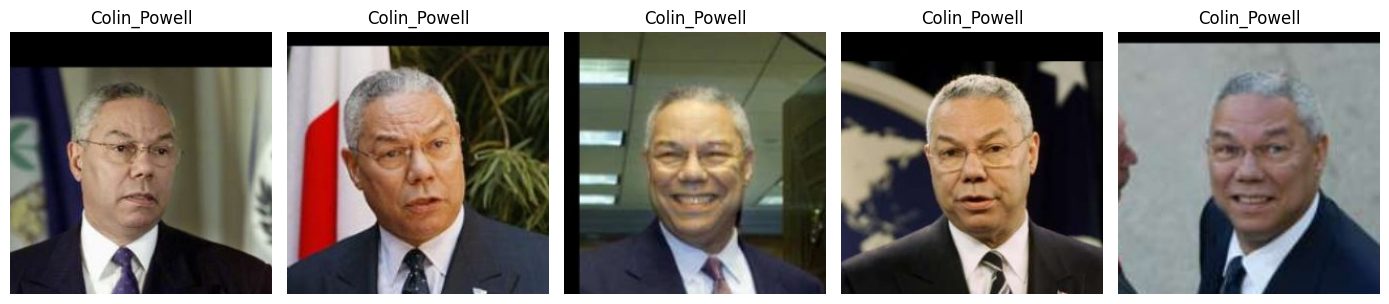

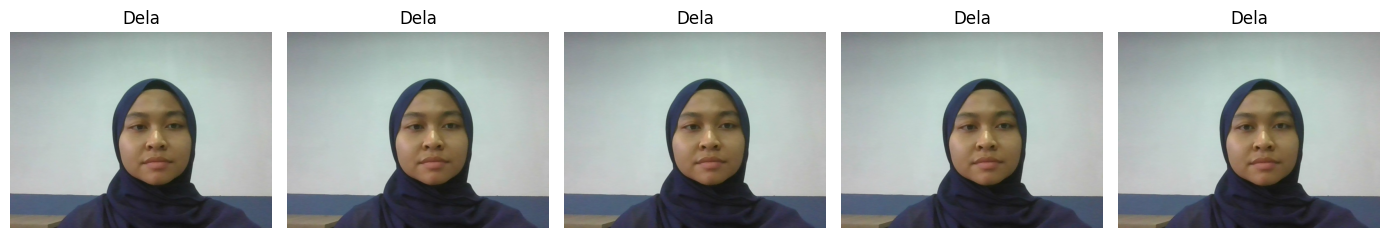

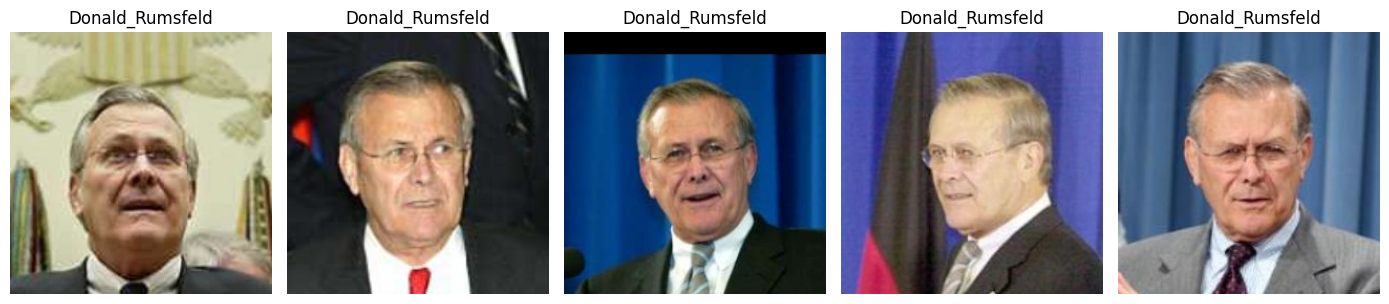

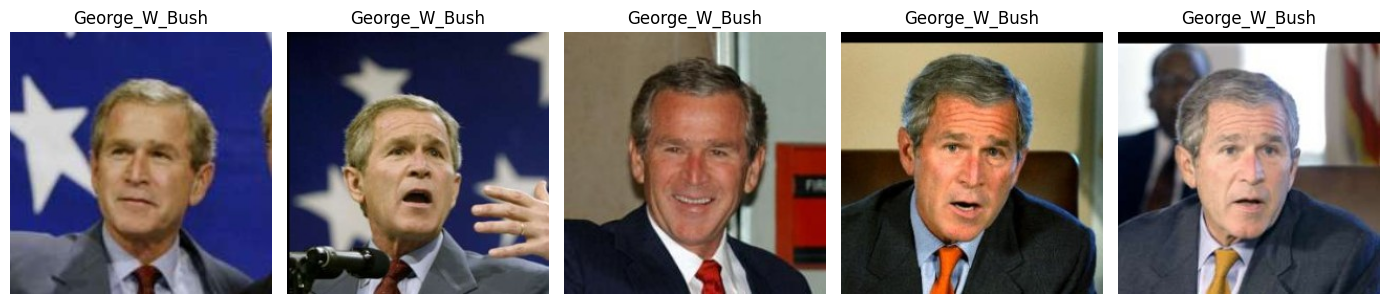

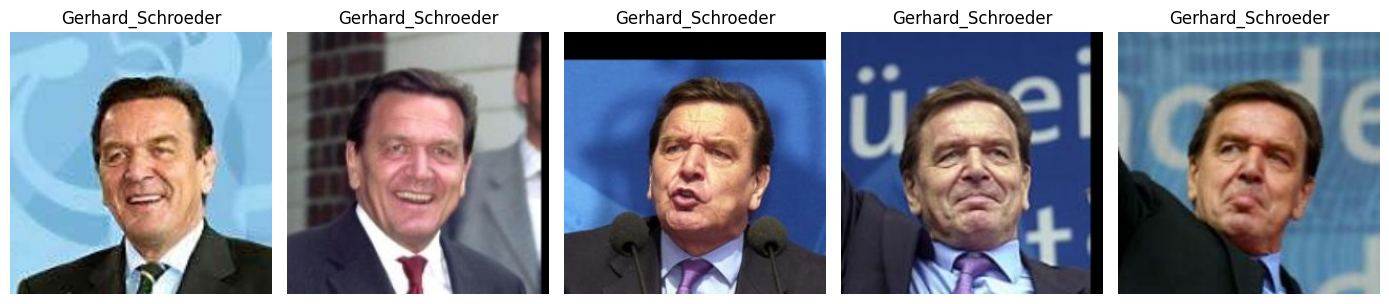

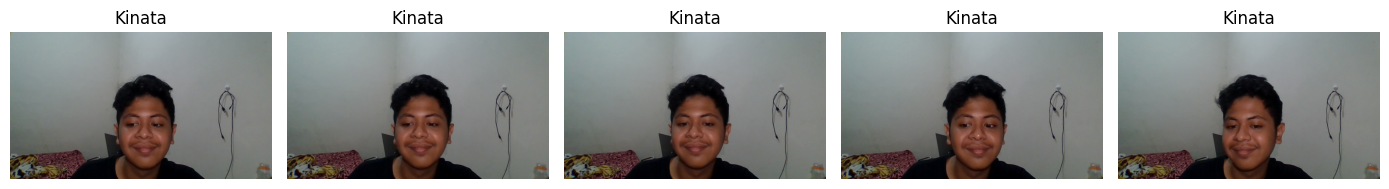

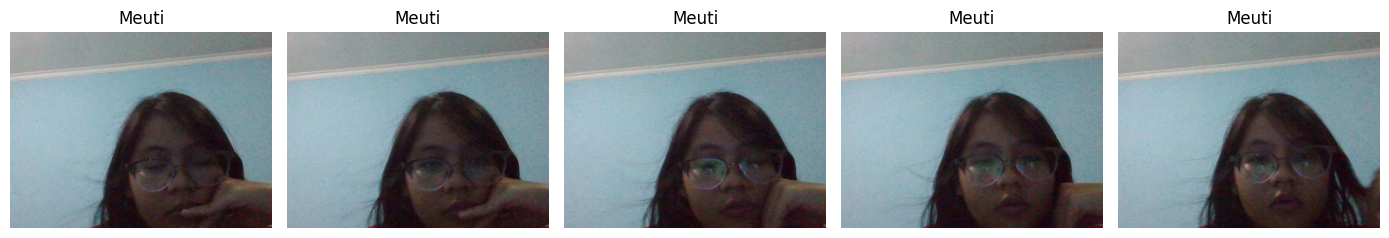

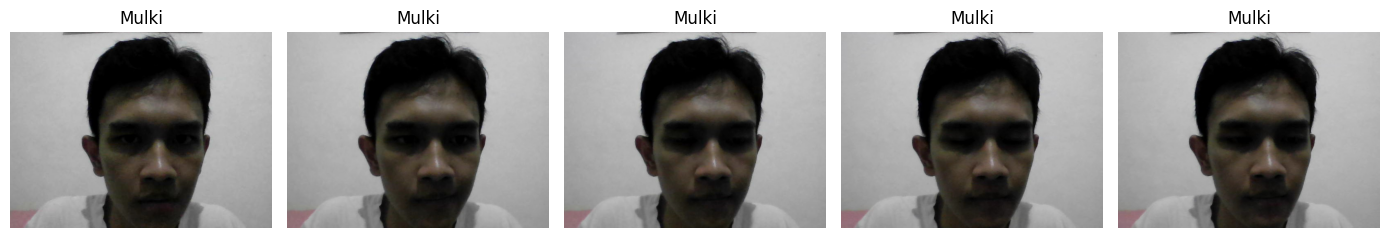

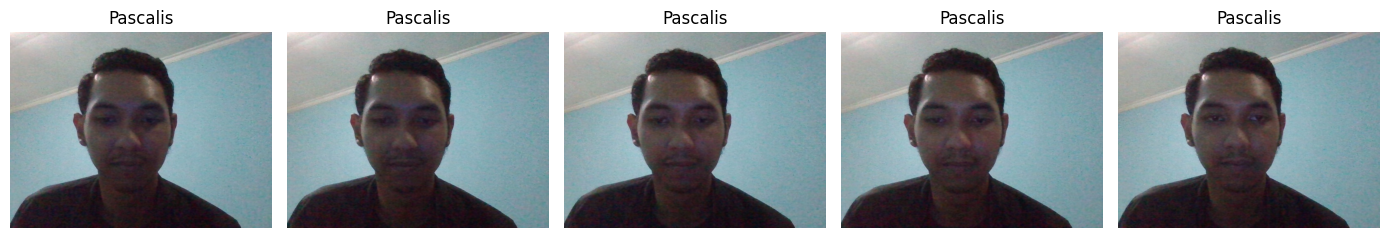

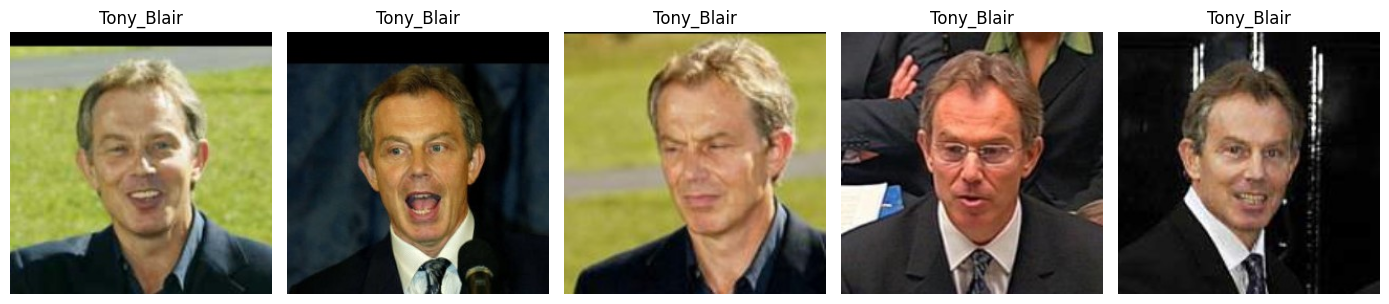

In [14]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

- crop, resize & convert to grayscale for detected face area using **cascade classifier**

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [16]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [17]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]

Face not found in image index 68
Face not found in image index 242
Face not found in image index 420
Face not found in image index 421
Face not found in image index 423
Face not found in image index 428
Face not found in image index 468
Face not found in image index 476
Face not found in image index 480
Face not found in image index 487
Face not found in image index 488
Face not found in image index 561
Face not found in image index 562
Face not found in image index 570
Face not found in image index 571
Face not found in image index 572
Face not found in image index 573
Face not found in image index 574
Face not found in image index 575
Face not found in image index 576
Face not found in image index 584
Face not found in image index 594
Face not found in image index 595
Face not found in image index 596
Face not found in image index 597
Face not found in image index 598
Face not found in image index 599
Face not found in image index 601
Face not found in image index 602
Face not found 

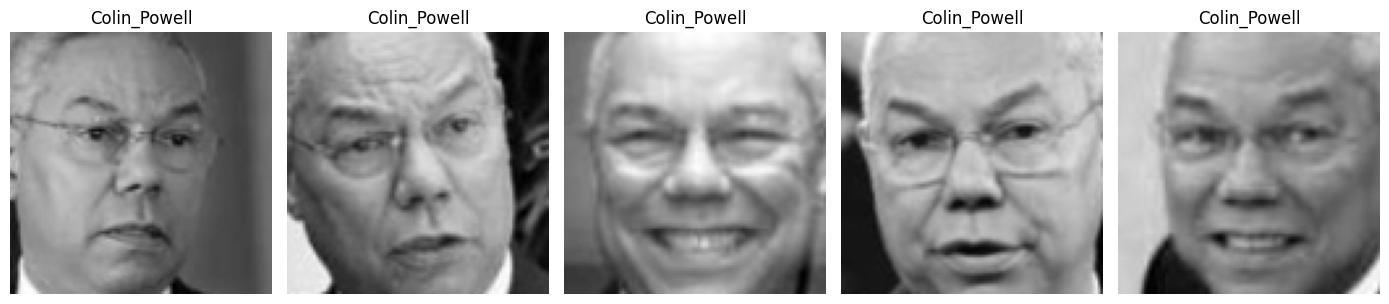

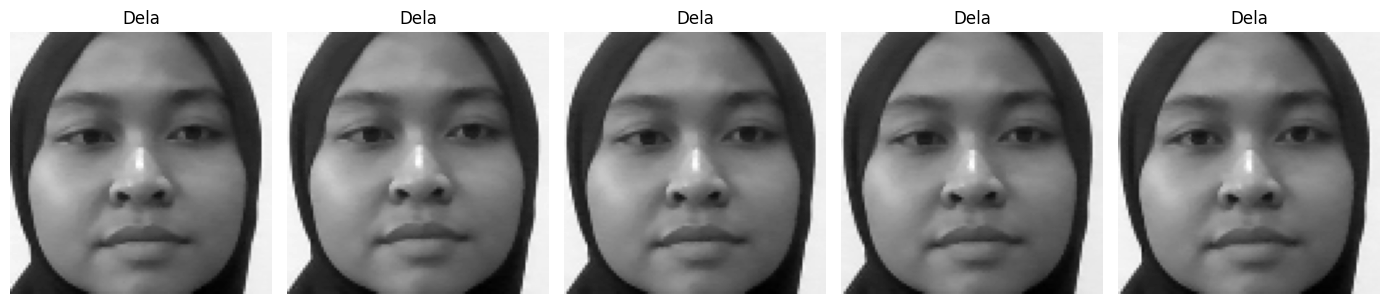

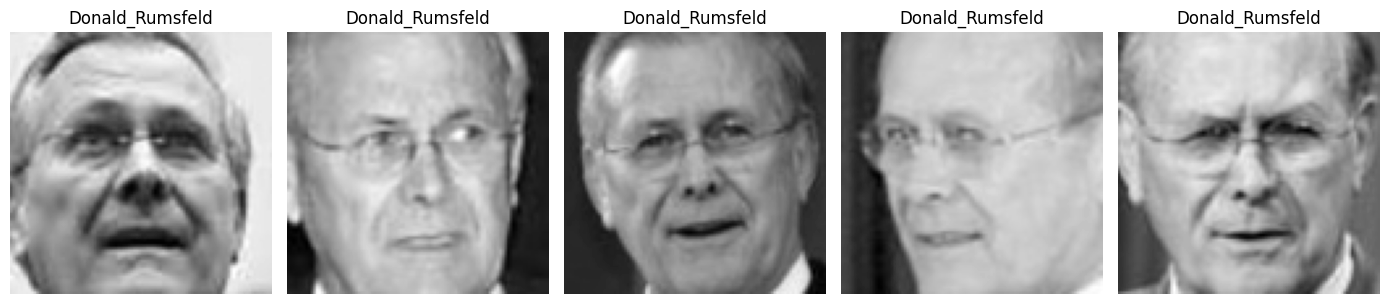

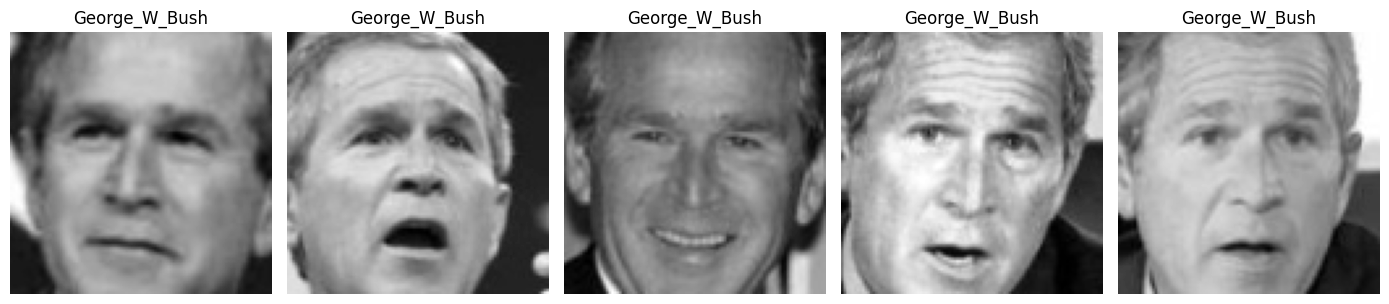

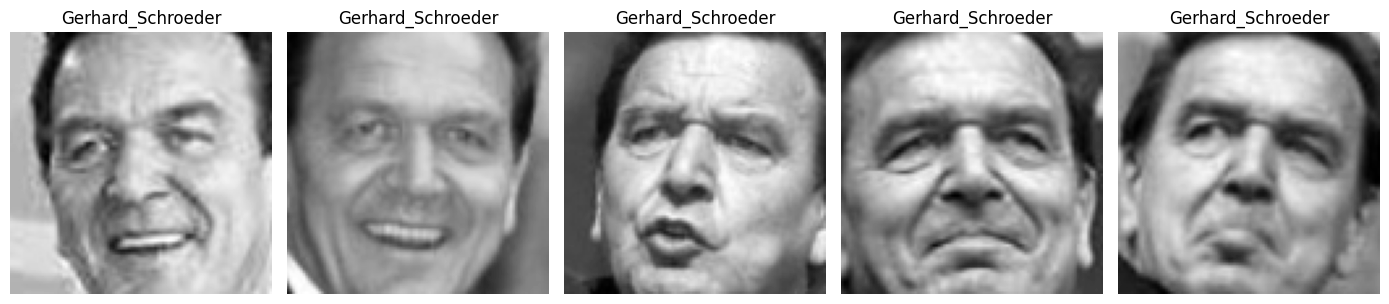

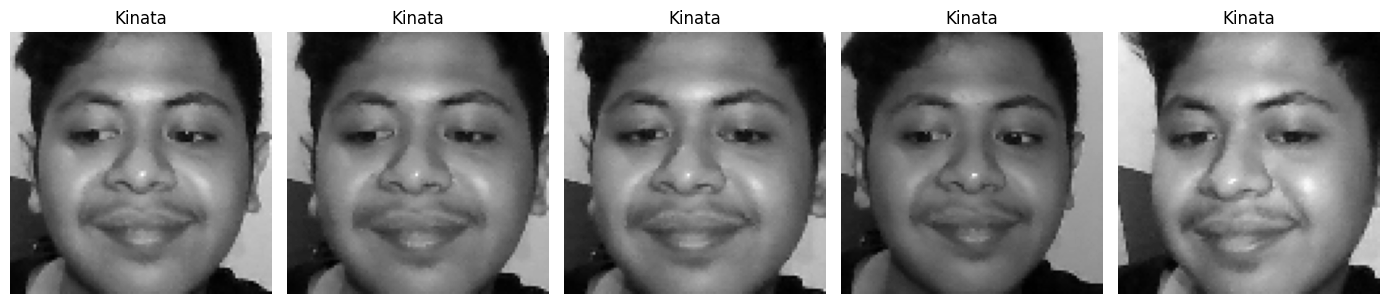

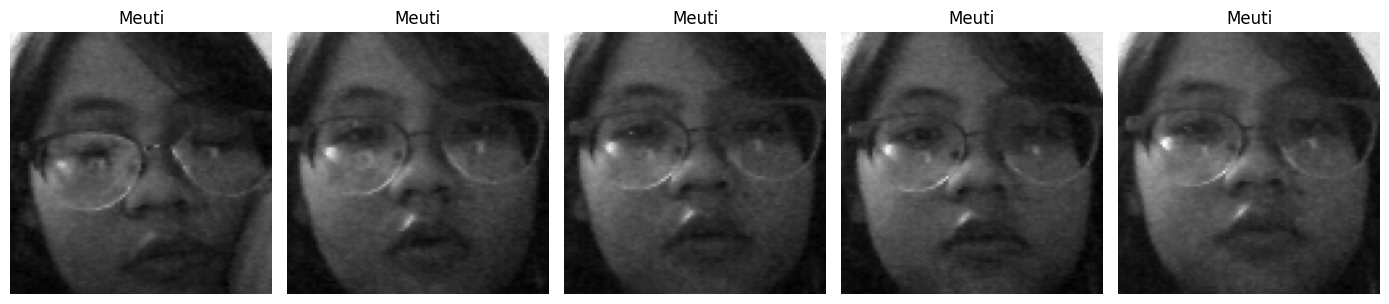

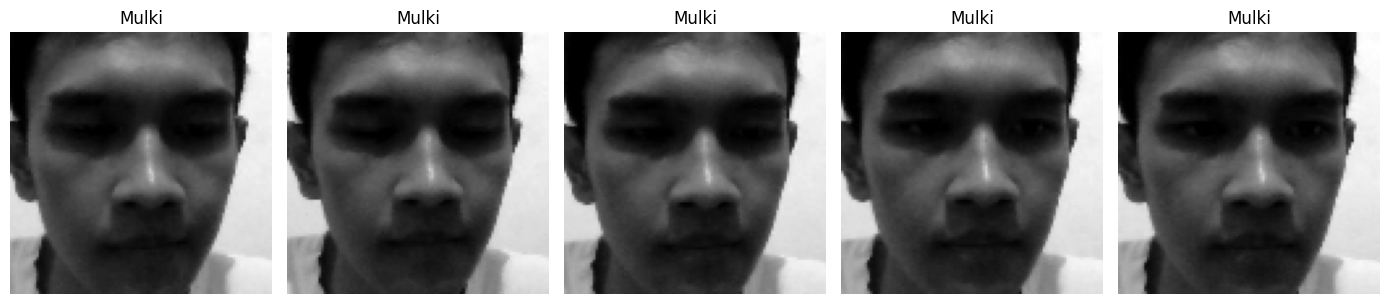

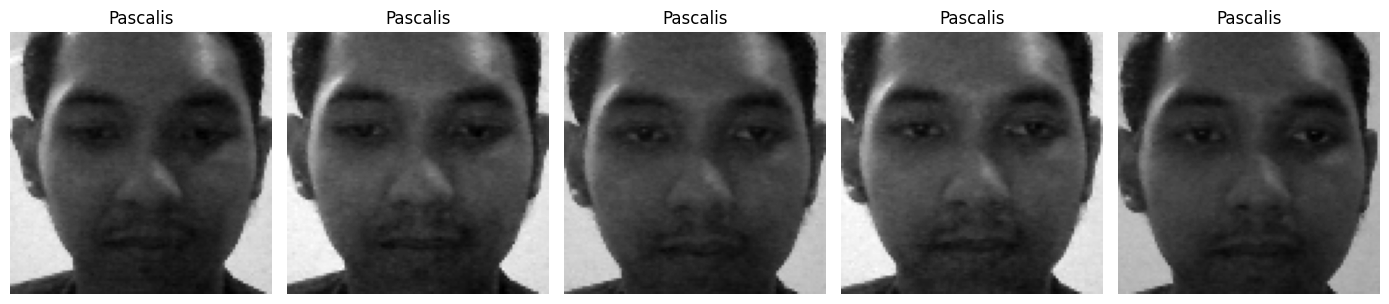

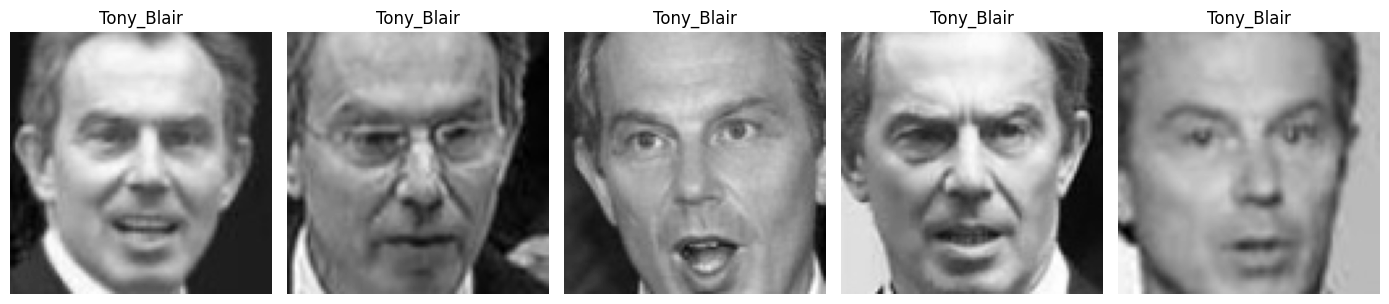

In [18]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

- encoding names

In [19]:
names

['Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell

In [20]:
print(labels)

['Colin_Powell' 'Dela' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Kinata' 'Meuti' 'Mulki' 'Pascalis' 'Tony_Blair']


In [21]:
name_vec = np.array([np.where(name == labels)[0][0] for name in names])

In [22]:
print(name_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 

#### Create Model Facerecognition
- Local Binary Pattern Histograms (LBPH)

In [23]:
model = cv2.face.LBPHFaceRecognizer_create()

In [24]:
model.train(croped_images, name_vec)

- save & load model

In [25]:
model.save("lbph_model.yml")

In [26]:
model.read("lbph_model.yml")

- Test Model

Found:  Dela
Confidence:  0.0


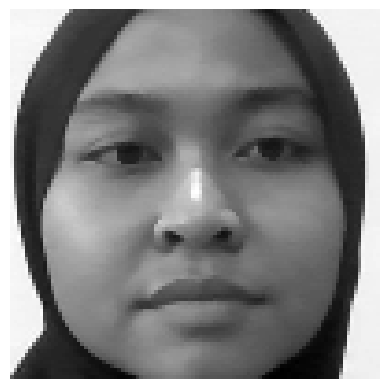

In [27]:
path = "test/Dela_0001.jpg"
 
img = cv2.imread(path)
img = detect_face(img, 0)

idx, confidence = model.predict(img)
 
print("Found: ", labels[idx])
print("Confidence: ", confidence)

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis(False)
plt.show()

- Apply to all Test dataset

Actual 	:  Colin_Powell_0115.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


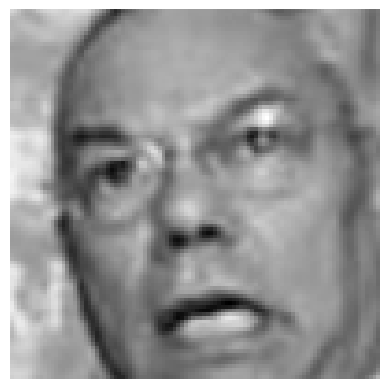

Actual 	:  Colin_Powell_0116.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


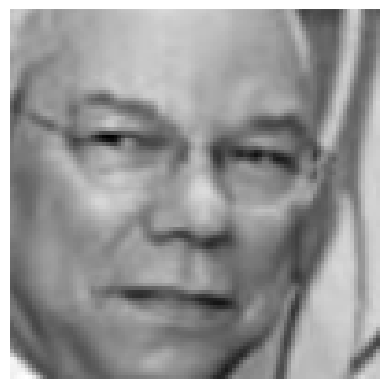

Actual 	:  Colin_Powell_0117.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


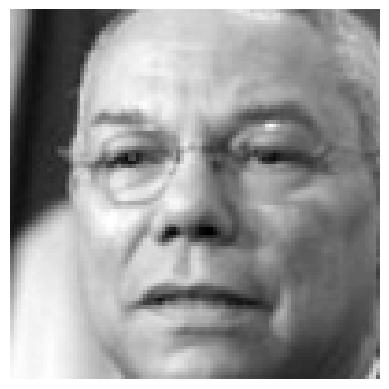

Actual 	:  Colin_Powell_0118.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


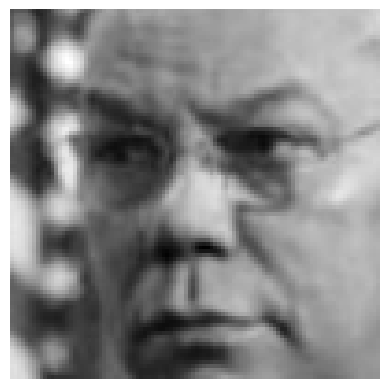

Actual 	:  Colin_Powell_0119.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


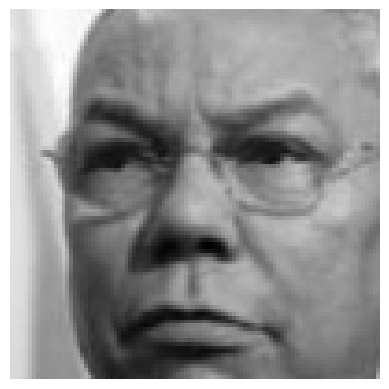

Actual 	:  Dela_0000.jpg
Predic 	:  Dela
Confidence 	:  0.0


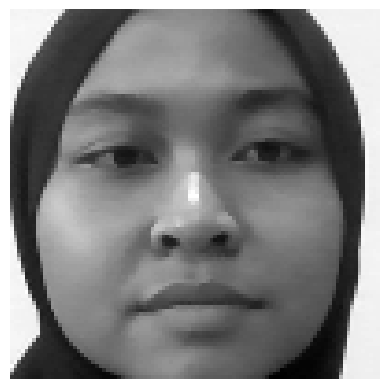

Actual 	:  Dela_0001.jpg
Predic 	:  Dela
Confidence 	:  0.0


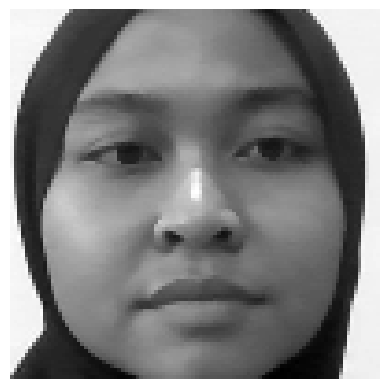

Actual 	:  Dela_0002.jpg
Predic 	:  Dela
Confidence 	:  0.0


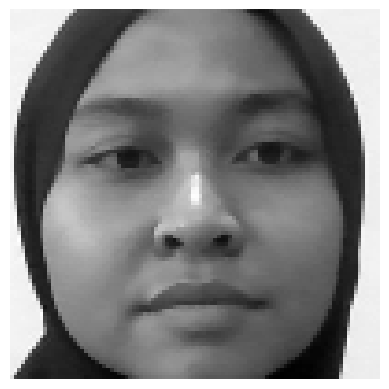

Actual 	:  Dela_0003.jpg
Predic 	:  Dela
Confidence 	:  0.0


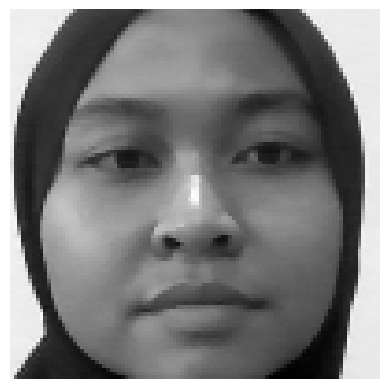

Actual 	:  Dela_0004.jpg
Predic 	:  Dela
Confidence 	:  0.0


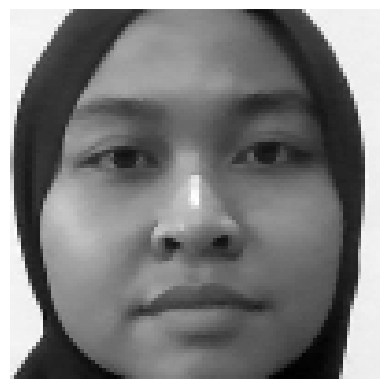

Actual 	:  Dela_0005.jpg
Predic 	:  Dela
Confidence 	:  0.0


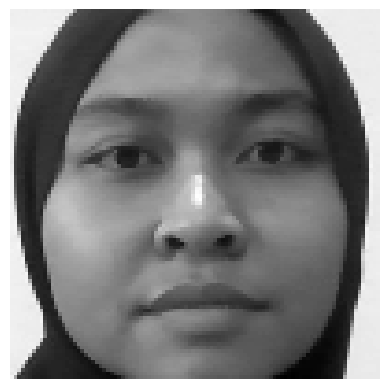

Actual 	:  Donald_Rumsfeld_0017.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


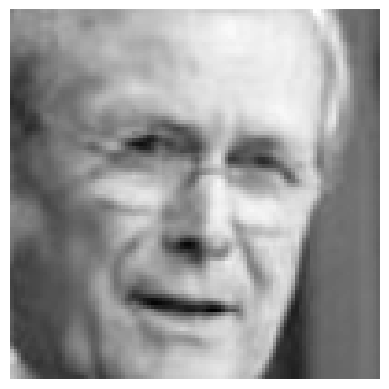

Actual 	:  Donald_Rumsfeld_0064.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


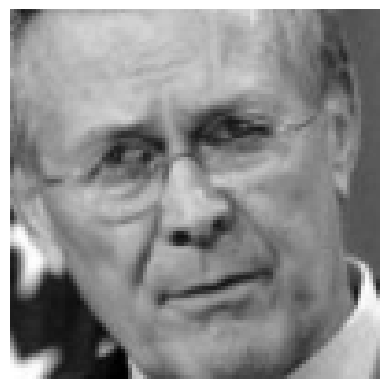

Actual 	:  Donald_Rumsfeld_0090.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


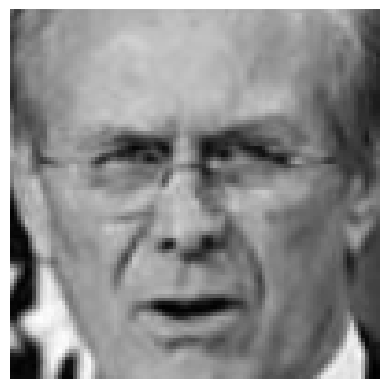

Actual 	:  Donald_Rumsfeld_0097.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


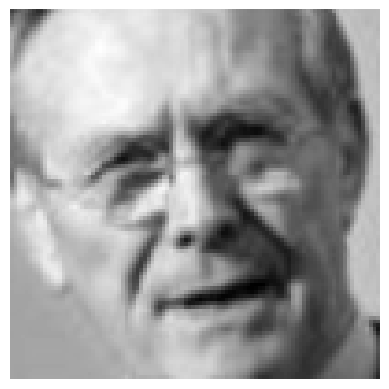

Actual 	:  Donald_Rumsfeld_0105.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  83.14840674910977


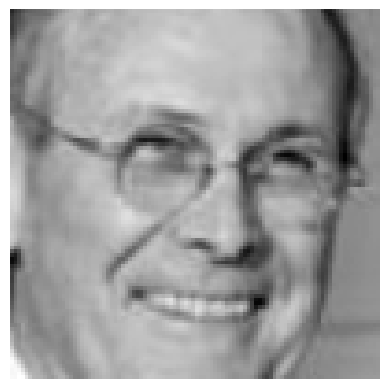

Actual 	:  George_W_Bush_0194.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.23153573987372


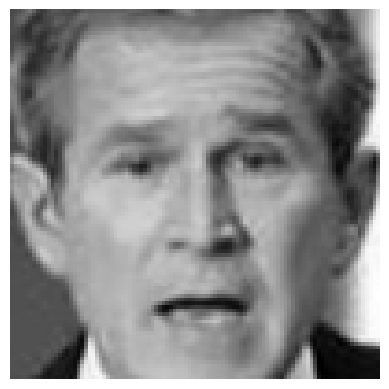

Actual 	:  George_W_Bush_0195.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.26353234476271


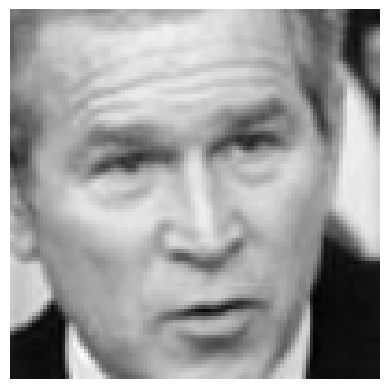

Actual 	:  George_W_Bush_0197.jpg
Predic 	:  George_W_Bush
Confidence 	:  83.24428685471469


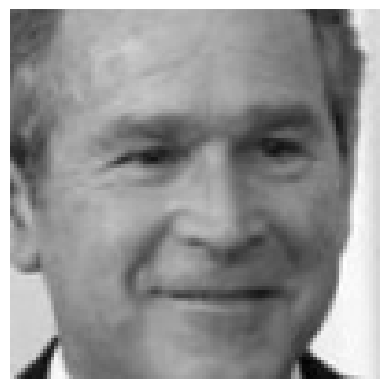

Actual 	:  George_W_Bush_0207.jpg
Predic 	:  George_W_Bush
Confidence 	:  69.25756609195612


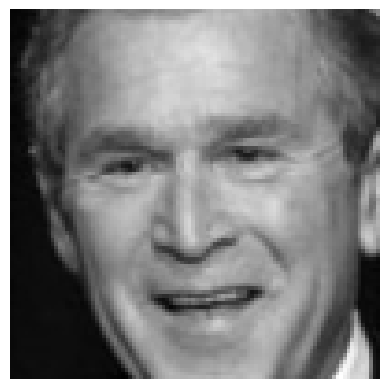

Actual 	:  George_W_Bush_0209.jpg
Predic 	:  George_W_Bush
Confidence 	:  67.4571943392215


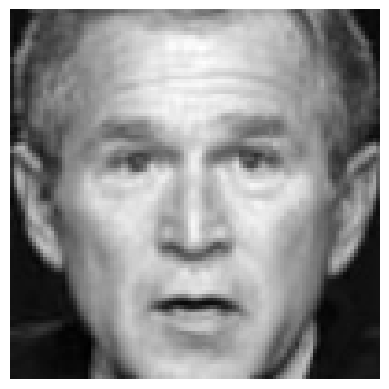

Actual 	:  Gerhard_Schroeder_0081.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


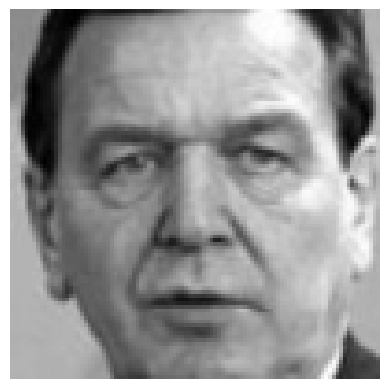

Actual 	:  Gerhard_Schroeder_0084.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


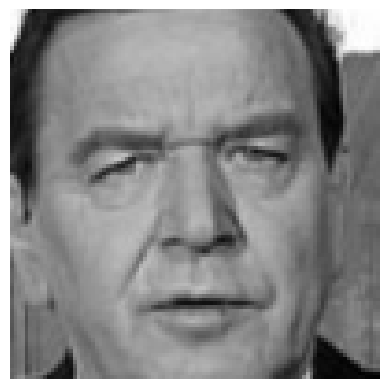

Actual 	:  Gerhard_Schroeder_0091.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


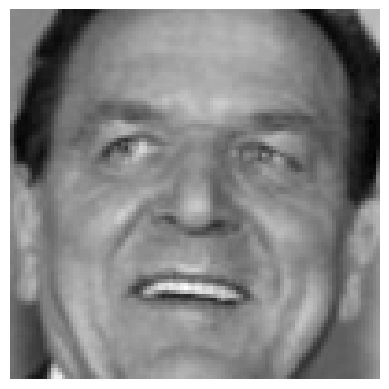

Actual 	:  Gerhard_Schroeder_0097.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


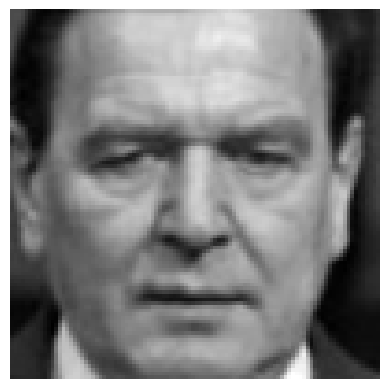

Actual 	:  Gerhard_Schroeder_0099.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


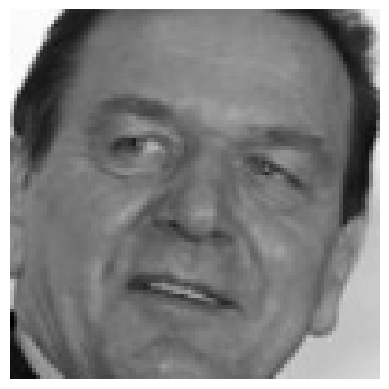

Actual 	:  Kinata_0041.jpg
Predic 	:  Kinata
Confidence 	:  0.0


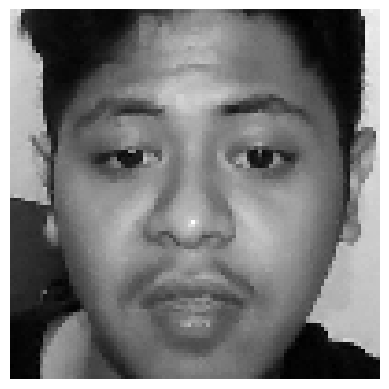

Actual 	:  Kinata_0042.jpg
Predic 	:  Kinata
Confidence 	:  0.0


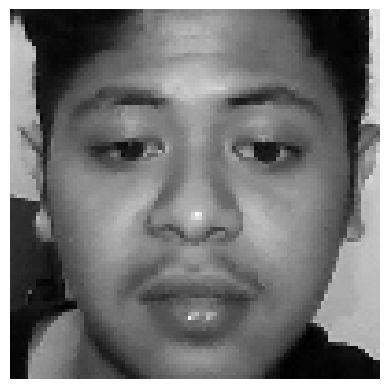

Actual 	:  Kinata_0043.jpg
Predic 	:  Kinata
Confidence 	:  0.0


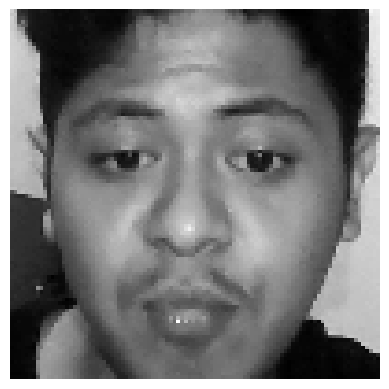

Actual 	:  Kinata_0044.jpg
Predic 	:  Kinata
Confidence 	:  0.0


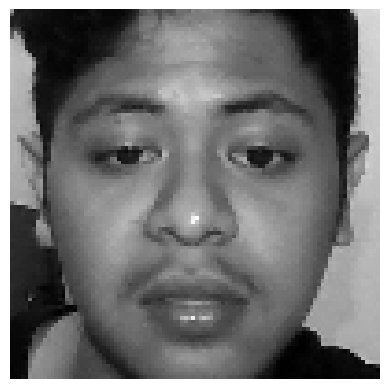

Actual 	:  Kinata_0045.jpg
Predic 	:  Kinata
Confidence 	:  0.0


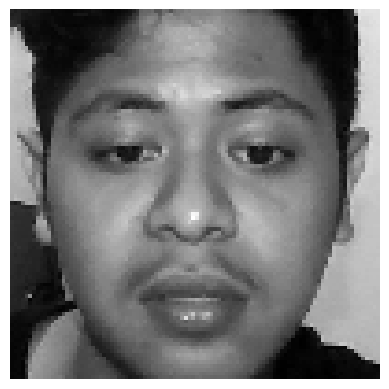

Actual 	:  Kinata_0046.jpg
Predic 	:  Kinata
Confidence 	:  0.0


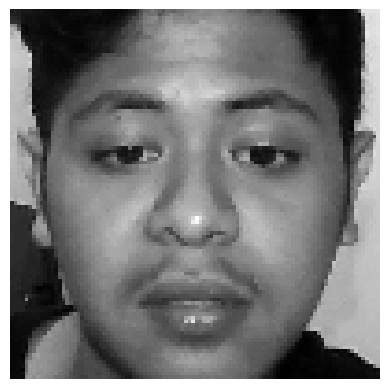

Actual 	:  Kinata_0047.jpg
Predic 	:  Kinata
Confidence 	:  0.0


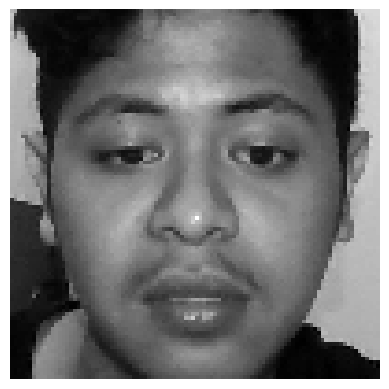

Actual 	:  Kinata_0048.jpg
Predic 	:  Kinata
Confidence 	:  0.0


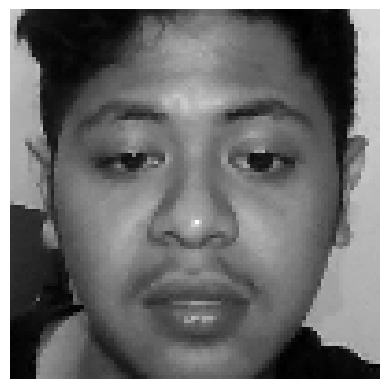

Actual 	:  Meuti_0010.jpg
Predic 	:  Meuti
Confidence 	:  0.0


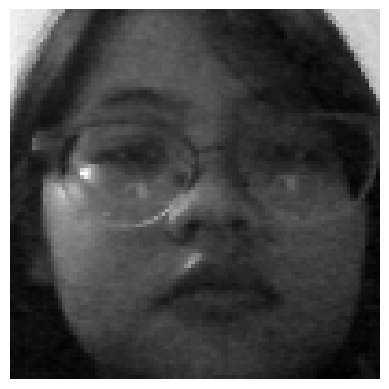

Actual 	:  Meuti_0011.jpg
Predic 	:  Meuti
Confidence 	:  0.0


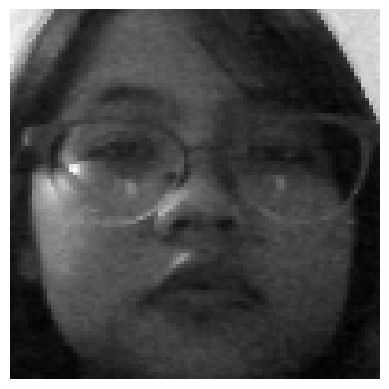

Actual 	:  Meuti_0012.jpg
Predic 	:  Meuti
Confidence 	:  0.0


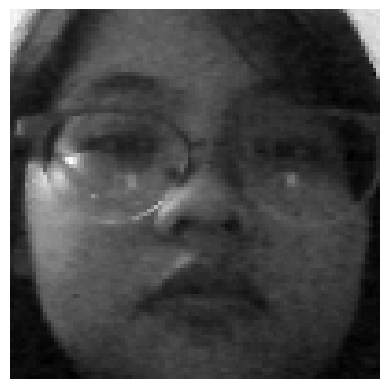

Actual 	:  Meuti_0013.jpg
Predic 	:  Meuti
Confidence 	:  0.0


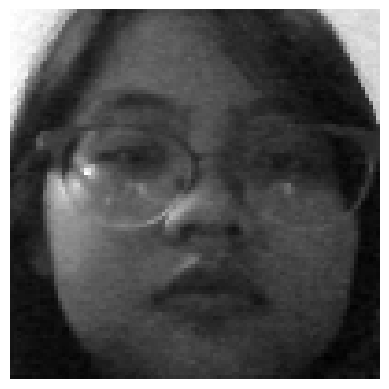

Actual 	:  Meuti_0014.jpg
Predic 	:  Meuti
Confidence 	:  0.0


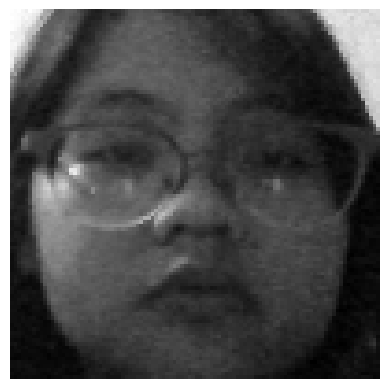

Actual 	:  Mulki_0013.jpg
Predic 	:  Mulki
Confidence 	:  0.0


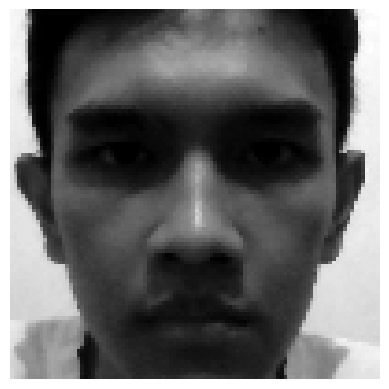

Actual 	:  Mulki_0014.jpg
Predic 	:  Mulki
Confidence 	:  0.0


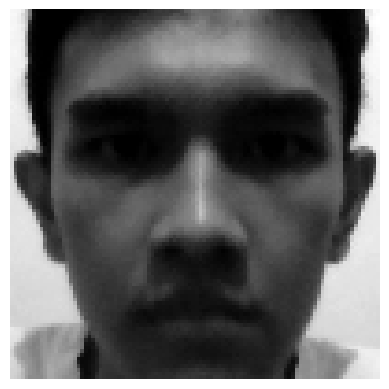

Actual 	:  Mulki_0015.jpg
Predic 	:  Mulki
Confidence 	:  0.0


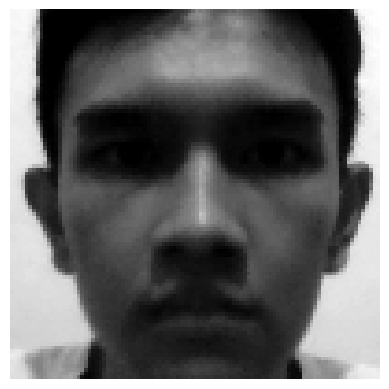

Actual 	:  Mulki_0016.jpg
Predic 	:  Mulki
Confidence 	:  0.0


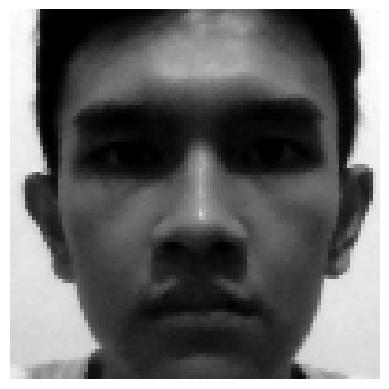

Actual 	:  Mulki_0017.jpg
Predic 	:  Mulki
Confidence 	:  0.0


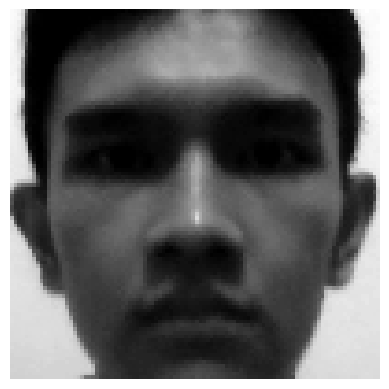

Actual 	:  Pascalis_0061.jpg
Predic 	:  Pascalis
Confidence 	:  0.0


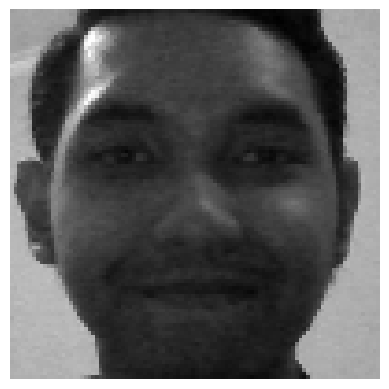

Actual 	:  Pascalis_0062.jpg
Predic 	:  Pascalis
Confidence 	:  0.0


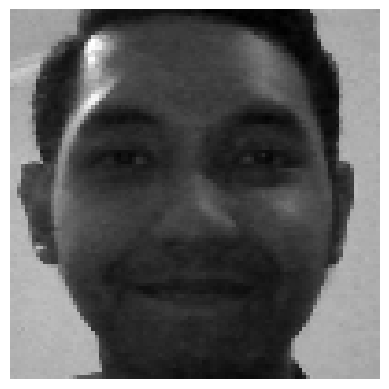

Actual 	:  Pascalis_0063.jpg
Predic 	:  Pascalis
Confidence 	:  0.0


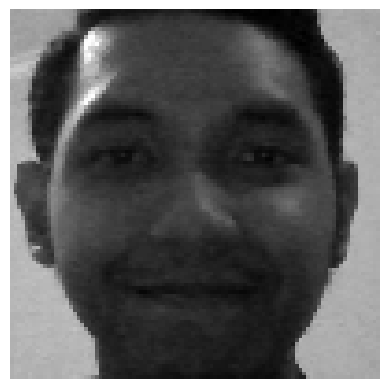

Actual 	:  Pascalis_0064.jpg
Predic 	:  Pascalis
Confidence 	:  0.0


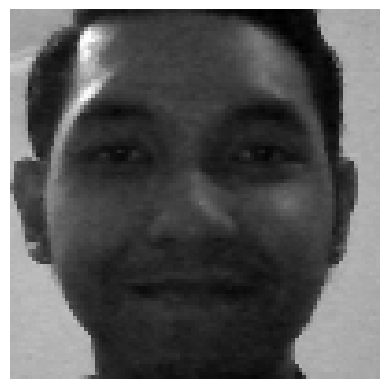

Actual 	:  Pascalis_0065.jpg
Predic 	:  Pascalis
Confidence 	:  0.0


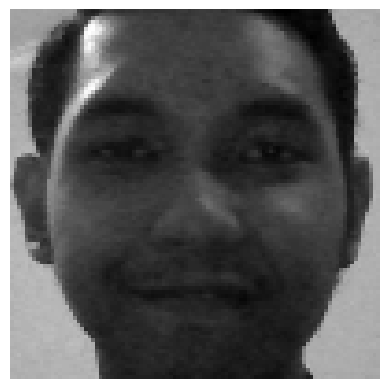

Actual 	:  Tony_Blair_0121.jpg
Predic 	:  Tony_Blair
Confidence 	:  82.91633963787804


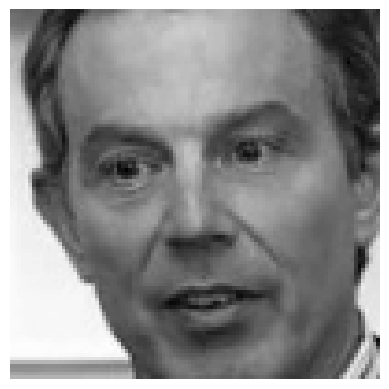

Actual 	:  Tony_Blair_0122.jpg
Predic 	:  Tony_Blair
Confidence 	:  85.77388718205535


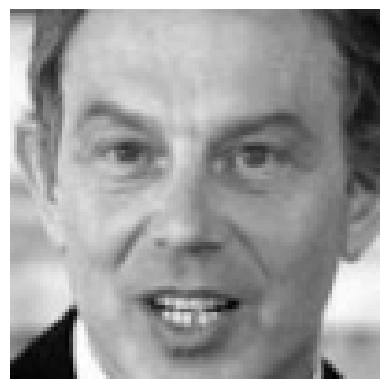

Actual 	:  Tony_Blair_0124.jpg
Predic 	:  Tony_Blair
Confidence 	:  81.37008612454139


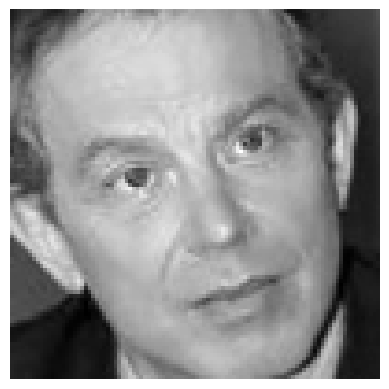

Actual 	:  Tony_Blair_0130.jpg
Predic 	:  Tony_Blair
Confidence 	:  77.35402989381915


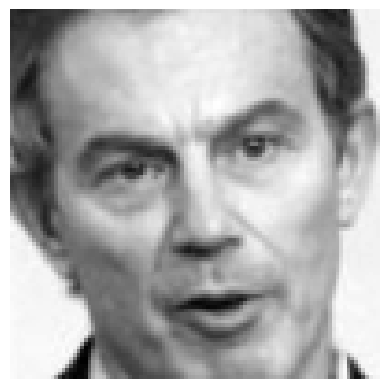

Actual 	:  Tony_Blair_0142.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  94.55138982501609


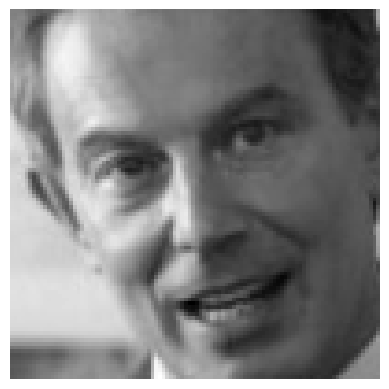

In [28]:
test_folder = "test/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        img = cv2.imread(path)
        img = detect_face(img, 0)

        idx, confidence = model.predict(img)
        
        actual_names.append(np.where(filename[:-9] == labels)[0][0]) #get label from filename (remove 9 last char)
        predicted_names.append(idx)
        confidences.append(confidence)
        
        print("Actual \t: ", filename)
        print("Predic \t: ", labels[idx])
        print("Confidence \t: ", confidence)

        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis(False)
        plt.show()

- Result summary

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

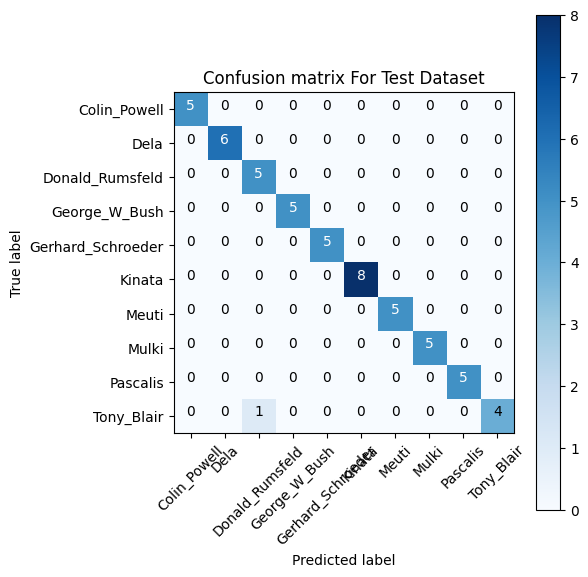

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_names, predicted_names)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For Test Dataset')

In [32]:
from sklearn.metrics import classification_report

In [33]:
print("== Classification Report for Test Dataset ==\n")
print(classification_report(actual_names, 
                            predicted_names, 
                            target_names=labels))

== Classification Report for Test Dataset ==

                   precision    recall  f1-score   support

     Colin_Powell       1.00      1.00      1.00         5
             Dela       1.00      1.00      1.00         6
  Donald_Rumsfeld       0.83      1.00      0.91         5
    George_W_Bush       1.00      1.00      1.00         5
Gerhard_Schroeder       1.00      1.00      1.00         5
           Kinata       1.00      1.00      1.00         8
            Meuti       1.00      1.00      1.00         5
            Mulki       1.00      1.00      1.00         5
         Pascalis       1.00      1.00      1.00         5
       Tony_Blair       1.00      0.80      0.89         5

         accuracy                           0.98        54
        macro avg       0.98      0.98      0.98        54
     weighted avg       0.98      0.98      0.98        54



___
#### Add Our Face to Dataset

- Create datset for our face 

In [9]:
cap = cv2.VideoCapture(0)

my_name = "Mulki"
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret :
        cv2.imshow("Capture Photo", frame)
        cv2.imwrite("my_face/%s_%04d.jpg" %  (my_name, i), frame)
        
        if cv2.waitKey(100) == ord('q') or i == 71:
            break
        i += 1    
cap.release()
cv2.destroyAllWindows()

In [10]:
! Dir dataset\

 Volume in drive D is New Volume
 Volume Serial Number is 8A53-86A0

 Directory of d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\dataset

13/12/2024  20:41    <DIR>          .
13/12/2024  23:18    <DIR>          ..
13/12/2024  14:02    <DIR>          Colin_Powell
13/12/2024  14:02    <DIR>          Dela
13/12/2024  14:02    <DIR>          Donald_Rumsfeld
13/12/2024  14:02    <DIR>          George_W_Bush
13/12/2024  14:02    <DIR>          Gerhard_Schroeder
13/12/2024  20:41    <DIR>          Meuti
13/12/2024  20:41    <DIR>          Pascalis
13/12/2024  14:02    <DIR>          Tony_Blair
               0 File(s)              0 bytes
              10 Dir(s)  248.614.465.536 bytes free


In [11]:
! mkdir dataset\Mulki

In [12]:
! move my_face\* dataset\Mulki

d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0000.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0001.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0002.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0003.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0004.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0005.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0006.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0007.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0008.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognition_AttendIT\my_face\Mulki_0009.jpg
d:\kuliah sem 5\PBL\AttendIT_FaceRecognition\face_recognitio

- Copy 5 file manualy from folder `dataset/<Your Name>` to `test/`

- Rerun Load dataset, Traing & Test Model

#### Test realtime video

In [31]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))
            
            idx, confidence = model.predict(face_img)
            label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

# Convert ke .tflite

In [29]:
# 1. Install tensorflow
!pip install tensorflow

In [30]:
# 2. Import library yang dibutuhkan
import tensorflow as tf
import numpy as np

# 3. Konversi model OpenCV LBPH ke format yang compatible dengan TensorFlow
def convert_lbph_to_tf_model():
    # Buat model TensorFlow yang equivalent dengan LBPH
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(100, 100, 1)),  # Sesuaikan dengan ukuran input
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(labels), activation='softmax')  # Output sesuai jumlah kelas
    ])
    
    # Compile model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Convert images dan labels ke format numpy array
    X = np.array(croped_images)
    X = X.reshape(-1, 100, 100, 1)  # Reshape ke format yang sesuai
    y = np.array(name_vec)
    
    # Train model
    model.fit(X, y, epochs=10, validation_split=0.2)
    
    return model

# 4. Convert ke TFLite
def convert_to_tflite(model):
    # Convert model ke TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    
    # Simpan model TFLite
    with open('face_recognition_model.tflite', 'wb') as f:
        f.write(tflite_model)

# 5. Jalankan konversi
tf_model = convert_lbph_to_tf_model()
convert_to_tflite(tf_model)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.3224 - loss: 142.8179 - val_accuracy: 0.1194 - val_loss: 4.9025
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - accuracy: 0.8021 - loss: 0.5799 - val_accuracy: 0.1194 - val_loss: 7.3211
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9316 - loss: 0.2890 - val_accuracy: 0.1194 - val_loss: 9.3485
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9291 - loss: 0.2332 - val_accuracy: 0.1194 - val_loss: 14.7587
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.9664 - loss: 0.1195 - val_accuracy: 0.1194 - val_loss: 16.5439
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.9727 - loss: 0.0822 - val_accuracy: 0.1194 - val_loss: 14.0352
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.9914 - loss: 0.0359 - val_accuracy: 0.1194 - val_loss: 17.9427
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.9941 - loss: 0.0238 - val_accu

INFO:tensorflow:Assets written to: C:\Users\DELAFA~1\AppData\Local\Temp\tmp83hil3gy\assets


Saved artifact at 'C:\Users\DELAFA~1\AppData\Local\Temp\tmp83hil3gy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1903485657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485657808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485656080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485658960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485656848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485659152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485657616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485659728: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [32]:
def convert_to_tflite(model, X):  # Tambahkan parameter X
    try:
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        
        # Aktifkan quantization
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        
        # Quantize ke int8
        converter.target_spec.supported_types = [tf.int8]
        
        # Normalisasi data X
        X = X.astype('float32') / 255.0
        
        # Tentukan representative dataset
        def representative_dataset():
            for i in range(min(100, len(X))):  # Pastikan tidak melebihi jumlah data
                data = X[i:i+1]
                yield [data]
        
        converter.representative_dataset = representative_dataset
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8
        
        print("Converting model to TFLite...")
        tflite_model = converter.convert()
        print("Conversion successful!")
        
        # Simpan model
        filename = 'face_recognition_model_quantized.tflite'
        with open(filename, 'wb') as f:
            f.write(tflite_model)
        print(f"Model saved as {filename}")
        
        # Cek ukuran file
        import os
        print(f"Model size: {os.path.getsize(filename) / (1024*1024):.2f} MB")
        
    except Exception as e:
        print(f"Error during conversion: {str(e)}")

# Panggil fungsi dengan data X
# Pastikan X adalah data training yang sudah di-reshape
X = np.array(croped_images)
X = X.reshape(-1, 100, 100, 1)

# Konversi model
convert_to_tflite(tf_model, X)

Converting model to TFLite...
INFO:tensorflow:Assets written to: C:\Users\DELAFA~1\AppData\Local\Temp\tmp23bo08r4\assets


INFO:tensorflow:Assets written to: C:\Users\DELAFA~1\AppData\Local\Temp\tmp23bo08r4\assets


Saved artifact at 'C:\Users\DELAFA~1\AppData\Local\Temp\tmp23bo08r4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1903485657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485657808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485656080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485658960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485656848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485659152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485657616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1903485659728: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\DELA FARAHITA ZEIN\anaconda3\Lib\site-packages\tensorflow\lite\python\convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Conversion successful!
Model saved as face_recognition_model_quantized.tflite
Model size: 8.35 MB


In [34]:
# 1. Import library yang dibutuhkan
import tensorflow as tf
import numpy as np

# 2. Buat dan training model terlebih dahulu
def create_and_train_model(X, y, labels):
    # Buat model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(100, 100, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    
    # Compile model
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Train model
    print("Training model...")
    model.fit(X, y, epochs=10, validation_split=0.2)
    print("Training completed!")
    
    return model

# 3. Fungsi konversi ke TFLite
def convert_to_tflite(model, X):
    try:
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        
        # Activate quantization
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        
        # Quantize to int8
        converter.target_spec.supported_types = [tf.int8]
        
        # Normalize data X
        X = X.astype('float32') / 255.0
        
        # Define representative dataset
        def representative_dataset():
            for i in range(min(100, len(X))):
                data = X[i:i+1]
                yield [data]
        
        converter.representative_dataset = representative_dataset
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8
        
        print("Converting model to TFLite...")
        tflite_model = converter.convert()
        print("Conversion successful!")
        
        # Save model
        filename = 'face_recognition_model_quantized_revision.tflite'
        with open(filename, 'wb') as f:
            f.write(tflite_model)
        print(f"Model saved as {filename}")
        
        # Check file size
        import os
        print(f"Model size: {os.path.getsize(filename) / (1024*1024):.2f} MB")
        
    except Exception as e:
        print(f"Error during conversion: {str(e)}")

# 4. Jalankan proses lengkap
if __name__ == "__main__":
    # Siapkan data
    X = np.array(croped_images)
    X = X.reshape(-1, 100, 100, 1)  # Reshape sesuai format yang dibutuhkan
    y = np.array(name_vec)
    
    # Buat dan training model
    trained_model = create_and_train_model(X, y, labels)
    
    # Konversi ke TFLite
    convert_to_tflite(trained_model, X)

Training model...
Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.1935 - loss: 90.8512 - val_accuracy: 0.1194 - val_loss: 6.5937
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.7044 - loss: 0.8681 - val_accuracy: 0.1194 - val_loss: 10.5724
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9275 - loss: 0.2818 - val_accuracy: 0.1194 - val_loss: 11.1439
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9575 - loss: 0.1501 - val_accuracy: 0.1194 - val_loss: 18.9508
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.9844 - loss: 0.0690 - val_accuracy: 0.1194 - val_loss: 19.2773
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.9913 - loss: 0.0318 - val_accuracy: 0.1119 - val_loss: 23.4636
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9965 - loss: 0.0169 - val_accuracy: 0.1194 - val_loss: 24.4863
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.9971 - loss:

INFO:tensorflow:Assets written to: C:\Users\DELAFA~1\AppData\Local\Temp\tmpipbhhwwj\assets


Saved artifact at 'C:\Users\DELAFA~1\AppData\Local\Temp\tmpipbhhwwj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1834945382352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945383120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945382160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945384272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945381968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945384464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945382928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1834945385040: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\DELA FARAHITA ZEIN\anaconda3\Lib\site-packages\tensorflow\lite\python\convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Conversion successful!
Model saved as face_recognition_model_quantized_revision.tflite
Model size: 2.09 MB
